In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("chronic_kidney_disease.csv")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)   # tampilkan semua kolom
pd.set_option('display.width', None)         # lebar bebas (tidak wrap)
pd.set_option('display.max_colwidth', None)  # isi kolom panjang tidak dipotong
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
# 📌 Cell 3 — Dataset Basic Information

print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      397 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [5]:
df.replace("?", np.nan, inplace=True)



In [7]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
Categorical: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [8]:
# numeric → median
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# categorical → modus
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [9]:
# target
df['class'] = df['class'].map({'ckd':1, 'notckd':0})

# yes/no
binary_cols = ['htn','dm','cad','pe','ane']
for c in binary_cols:
    df[c] = df[c].map({'yes':1, 'no':0})

# normal/abnormal
df['rbc'] = df['rbc'].map({'normal':0, 'abnormal':1})
df['pc']  = df['pc'].map({'normal':0, 'abnormal':1})

# present/notpresent
df['pcc'] = df['pcc'].map({'present':1, 'notpresent':0})
df['ba']  = df['ba'].map({'present':1, 'notpresent':0})

# appetite
df['appet'] = df['appet'].map({'good':0, 'poor':1})

# ======================================================
# 6. SAFETY → pastikan semua numeric
# ======================================================
# pastikan semua numeric
df = df.apply(pd.to_numeric, errors='coerce')

# isi semua NaN
df = df.fillna(df.median())


In [10]:
# 📌 Cell 9 — Split & MinMax Scaling

X = df.drop('class', axis=1)
y = df['class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)


===== KNN GridSearchCV ===telek====
Best Parameters:
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

===== PERFORMANCE METRICS ===telek====
Accuracy  : 0.988
Precision : 1.000
Recall    : 0.980
F1-score  : 0.990

All Parameters Used by Best Model:
{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Test Accuracy: 0.9875

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



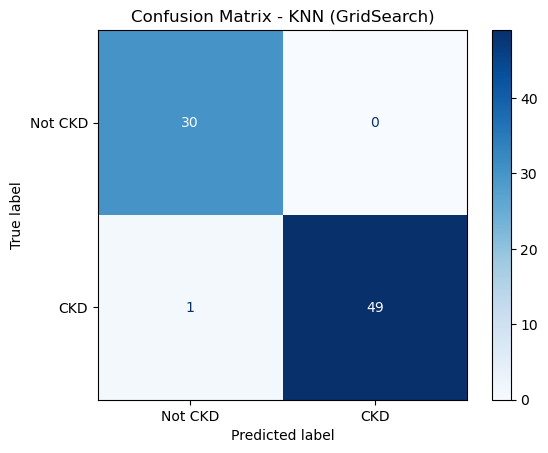

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from scipy.stats import randint, uniform
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15,],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50]
}

grid_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=10,
    scoring='recall',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

# ===== CETAK HASIL =====
print("===== KNN GridSearchCV ===telek====")
print("Best Parameters:")
print(grid_knn.best_params_)
# ======================================================
# 📊 METRICS RINGKAS
# ======================================================

# Evaluasi ke data uji to get y_pred_knn_grid first
y_pred_knn_grid = grid_knn.best_estimator_.predict(X_test)

acc  = accuracy_score(y_test, y_pred_knn_grid)
prec = precision_score(y_test, y_pred_knn_grid)
rec  = recall_score(y_test, y_pred_knn_grid)
f1   = f1_score(y_test, y_pred_knn_grid)

print("\n===== PERFORMANCE METRICS ===telek====")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1-score  : {f1:.3f}")


print("\nAll Parameters Used by Best Model:")
print(grid_knn.best_estimator_.get_params())

acc_knn_grid = accuracy_score(y_test, y_pred_knn_grid)

print("\nTest Accuracy:", acc_knn_grid)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn_grid))
cm_knn_grid = confusion_matrix(y_test, y_pred_knn_grid)

disp_knn_grid = ConfusionMatrixDisplay(
    confusion_matrix=cm_knn_grid,
    display_labels=['Not CKD','CKD']
)

disp_knn_grid.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN (GridSearch)")
plt.show()

In [14]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import joblib

joblib.dump(grid_knn.best_estimator_, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model KNN dan Scaler berhasil disimpan!")

Model KNN dan Scaler berhasil disimpan!
